# Fraud Detection Project - Main Notebook

Contents:

* [Data Understanding](#Data-Understanding)
    - [Importing Data](#Importing-Data)
    - [Describing Data](#Describing-Data)
    - [Tidying Data](#Tidying-Data)
* [Data Preparation](#Data-Preparation)
    - [Selecting Data](#Selecting-Data)
    - [Cleaning Data](#Cleaning-Data)
    - [Exploratory Data Analysis (EDA)](#EDA)
        + Statistical EDA
        + Visual EDA

## Data Understanding

### Importing Data

In [1]:
# Import necessary modules
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

In [2]:
# Initiate directory paths
data_folder = '/Users/stb/Documents/Github/fraud-detection/data/'

ads_list = []
with open(data_folder + '/autos_20190626.json','r') as file:
    for ad in file:
        ads_list.append(json.loads(ad))
autos = pd.DataFrame(ads_list)

### Describing Data

In [3]:
autos.head(3)

,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Availability,Available from,Body,Body Color,Body Color Original,CO2 Emission,Consumption,Country version,Cylinders,Displacement,Drive chain,Electricity consumption,Emission Class,Emission Label,First Registration,Fuel,Full Service,Gearing Type,Gears,Inspection new,Last Service Date,Last Timing Belt Service Date,Make,Model,Model Code,Next Inspection,Non-smoking Vehicle,Nr. of Doors,Nr. of Seats,Offer Number,Other Fuel Types,Paint Type,Previous Owners,Type,Upholstery,Warranty,Weight,body_type,description,hp,kW,km,make_model,null,prev_owner,price,registration,short_description,url,vat
0,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Sedans, \n]","[\n, Black, \n]",[\nMythosschwarz\n],[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN,[\n3\n],"[\n1,422 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],NaN,"[\n, 2016, \n]","[\n, Diesel (Particulate Filter), \n]","[\n, \n]","[\n, Automatic, \n]",NaN,"[\nYes\n, \nEuro 6\n]",NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\n0588/BDF\n],"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\n, \n]",[\n5\n],[\n5\n],[\nLR-062483\n],NaN,[\nMetallic\n],\n2\n,"[, Used, , Diesel (Particulate Filter)]","[\nCloth, Black\n]","[\n, \n, \n4 (Green)\n]","[\n1,220 kg\n]",Sedans,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",66 kW,None,"56,013 km",Audi A1,[],2 previous owners,15770,01/2016,Sportback 1.4 TDI S-tronic Xenon Navi Klima,https://www.autoscout24.com//offers/audi-a1-sp...,VAT deductible
1,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",NaN,NaN,"[\n, Sedans, \n]","[\n, Red, \n]",NaN,[\n129 g CO2/km (comb)\n],"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",NaN,[\n4\n],"[\n1,798 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],[\n4 (Green)\n],"[\n, 2017, \n]","[\n, Gasoline, \n]",NaN,"[\n, Automatic, \n]",[\n7\n],NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\n0588/BCY\n],NaN,NaN,[\n3\n],[\n4\n],NaN,NaN,NaN,NaN,"[, Used, , Gasoline]","[\nCloth, Grey\n]",NaN,"[\n1,255 kg\n]",Sedans,[\nLangstreckenfahrzeug daher die hohe Kilomet...,141 kW,None,"80,000 km",Audi A1,[],None,14500,03/2017,1.8 TFSI sport,https://www.autoscout24.com//offers/audi-a1-1-...,Price negotiable
2,"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Sedans, \n]","[\n, Black, \n]",[\nmythosschwarz metallic\n],[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN,NaN,"[\n1,598 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],[\n4 (Green)\n],"[\n, 2016, \n]","[\n, Diesel (Particulate Filter), \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",NaN,NaN,NaN,[\n4\n],[\n4\n],[\nAM-95365\n],NaN,[\nMetallic\n],\n1\n,"[, Used, , Diesel (Particulate Filter)]","[\nCloth, Black\n]","[\n, \n, \n99 g CO2/km (comb)\n]",NaN,Sedans,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",85 kW,None,"83,450 km",Audi A1,[],1 previous owner,14640,02/2016,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,https://www.autoscout24.com//offers/audi-a1-sp...,VAT deductible


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):

Comfort & Convenience
          14999 non-null object

Entertainment & Media
          14545 non-null object

Extras
                         12957 non-null object

Safety & Security
              14937 non-null object
Availability                     635 non-null object
Available from                   272 non-null object
Body                             15859 non-null object
Body Color                       15322 non-null object
Body Color Original              12160 non-null object
CO2 Emission                     14111 non-null object
Consumption                      14013 non-null object
Country version                  7586 non-null object
Cylinders                        10239 non-null object
Displacement                     15423 non-null object
Drive chain                      9061 non-null object
Electricity consumption          137 non-null object
Emission Class     

In [6]:
# Show the proportion of missing values which are higher than 0.5
autos.isnull().mean()[autos.isnull().mean() > 0.5].sort_values(ascending=False)

kW                               1.000000
Last Timing Belt Service Date    0.998995
Electricity consumption          0.991394
Available from                   0.982913
Last Service Date                0.964445
Availability                     0.960111
Other Fuel Types                 0.944720
Next Inspection                  0.777938
Inspection new                   0.753000
Emission Label                   0.749670
Model Code                       0.687292
Non-smoking Vehicle              0.549155
Country version                  0.523463
dtype: float64

### Tidying Data

In [7]:
def name_columns(data):
    '''
    Name columns with underscore(_) convention.
    '''
    # Clean "\n"s from the column names
    data.columns = data.columns.str.strip("\n")

    # Make lowercase
    data.columns = data.columns.str.lower()
    
    # Replace space with underscore(_)
    data.columns = data.columns.str.replace(" ", "_")
    
    # Replace . with ""
    data.columns = data.columns.str.replace(".", "")
    
    # Replace "_&_" with "&"
    data.columns = data.columns.str.replace("_&_", "_")
    
    # Replace "-" with "_"
    data.columns = data.columns.str.replace("-", "_")
    
    # Replace "\n" with ""
    data.columns = data.columns.str.replace("\n", "")
    
    return data.columns

In [8]:
# Tidy column names
autos.columns = name_columns(autos)

## Data Preparation

### Selecting Data

In [9]:
t_cols = ['safety_security', 'co2_emission', 'consumption', 'country_version', 
          'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection',
          'non_smoking_vehicle', 'body_type', 'description', "hp", 'kw', 'km', "make_model", 
          "offer_number"]

In [10]:
m_cols = ['entertainment_media', 'availability', 'available_from', 'body',
        'body_color', 'body_color_original', 'full_service', 'gearing_type', 'gears',
        'inspection_new', 'last_service_date', 'last_timing_belt_service_date', 'paint_type',
        'null', 'price', 'registration', 'short_description', 'vat']

In [11]:
v_cols = ['comfort_convenience', 'extras', 'drive_chain',
         'electricity_consumption', 'emission_class', 'emission_label',
         'first_registration', 'fuel', 'nr_of_doors', 'nr_of_seats',
         'other_fuel_types', 'previous_owners', 'type', 'upholstery', 'warranty',
         'weight', 'prev_owner', 'url']

### Cleaning Data

In [12]:
def clean_t (data):
    
    # Select columns to clean
    df = data
    
    # Create dummies using the items in the list of 'safety&security' column
    df_new = df.join(df['safety_security'].str.join('|').str.get_dummies().add_prefix('ss_'))
    # Drop 'safety_security' column
    df_new.drop('safety_security', axis=1, inplace=True)
    
    # Clean the model column
    df_new['model'] = df.model.apply(lambda x: x[1])
    
    # Strip "\n"s from the 'make' column
    df_new['make'] = df.make.str.strip("\n")
    
    # Drop unnecesary column 'make_model'
    df_new.drop(columns = "make_model", inplace = True)
    
    # Clean 'model_code' column
    df_new.loc[df_new.model_code.notnull(), "model_code"] = df.model_code[df.model_code.notnull()].apply(lambda x: str(x)[4:-4])
    
    # Clean 'country_version' column
    df_new.loc[df_new.country_version.notnull(), "country_version"] = df.country_version[df.country_version.notnull()].apply(lambda x: str(x)[4:-4])
    
    # Clean 'co2_emission' column
    df_new['co2_emission'] = df.co2_emission.str[0].str.extract(r'(\d+)')
    # Change the 'co2' columns data type to numeric
    df_new['co2_emission'] = pd.to_numeric(df_new.co2_emission)
    
    # Clean 'cylinders' column
    df_new['cylinders'] = df.cylinders.str[0].str.extract(r'(\d+)')
    # Change the 'cylinders' columns data type to numeric
    df_new['cylinders'] = pd.to_numeric(df_new['cylinders'])
    
    # Extract displacement values (and remove commas)
    df_new['displacement'] = df.displacement.str[0].str.replace(",","").str.extract(r'(\d+)')
    # Change the type of displacement from object to numeric
    df_new['displacement'] = pd.to_numeric(df_new['displacement'])

    # Extract 'next_inspection' values
    df_new.next_inspection = df.next_inspection.str[0].str.strip("\n")
    # Create a boolean column from `next_inspection`
    df_new['next_inspection_bool'] = df_new.next_inspection.notnull()
    
    # Drop 'non-smoking_vehicle' column
    df_new.drop("non_smoking_vehicle", axis=1, inplace=True)
    
    # Extract hp from 'hp' column
    df_new['hp'] = df.hp.str.extract(r'(\d+)')
    # Change datatype to numeric
    df_new['hp'] = pd.to_numeric(df_new['hp'])
    
    # Drop 'kw' column
    df_new.drop('kw', axis=1, inplace=True)
    
    # Clean 'km' column
    df_new['km'] = df.km.str.replace(",", "").str.extract(r'(\d+)')
    
    
    # Clean "offer_number' column
    df_new['offer_number'] = df.offer_number.str[0].str.replace("\n","")
    
    # Create a boolean for checking "combined" consumption
    comb_bool = df.consumption.str[0].str[0].str.contains("comb", na=False)
    # Create a new column for 'consumption_comb'
    df_new['consumption_comb'] = df[comb_bool].consumption.str[0].str[0].str.extract(r'(\d.\d|\d)')
    # Drop 'consumption' column
    df_new.drop('consumption', axis=1, inplace=True)
    
    # Tidy column names
    df_new.columns = name_columns(df_new)
    
    # Tidy column names
    df_new.columns = name_columns(df_new)
    
    # Change description from list to string
    df_new['description'] = df['description'].str.join('').str.strip("\n")[0]
    
    return df_new

In [13]:
def clean_m(data):
    
    df=data
    
    #cleaning registration column and convertinf it to age column
    reg_new = df.registration[~df.registration.str.contains("-")]
    reg_new = pd.to_datetime(reg_new, format='%m/%Y')
    reg_year = reg_new.apply(lambda x: x.year)
    df['age'] = 2019 - reg_year
    
    df['gearing_type'] = df['gearing_type'].apply(lambda x:x[1])
    
    df.loc[df['body'].notnull(), 'body'] = df.loc[df['body'].notnull(), 'body'].apply(lambda x: x[1])
    
    df.loc[df['body_color'].notnull(), 'body_color'] = df.loc[df['body_color'].notnull(), 'body_color'].apply(lambda x: x[1])
         
    df=df.join(df['entertainment_media'].str.join('|').str.get_dummies().add_prefix('entertainment_media_'))
    
    df['gears']=df.gears.str[0].str.replace("\n", "")
    
    df['paint_type']=df.paint_type.str[0].str.replace("\n", "")
    
    # converting inspection_new column to 1 if it contains Yes expression, else: 0
    df["inspection_new"] = df.inspection_new.str[0].str.contains("Yes", na=False)*1
     
    # extracting the number of days in availabiltiy column and converting column name to available_after_days
    df['availability'] = df.availability.str.extract(r'(\d+)')
    df['available_after_days'] = df.availability.apply(pd.to_numeric)
    
    # finding right pattern for date in a mixed column: 2 digits/4 digits to extract the date
    df['last_service_date'] = df.last_service_date.str[0].str.extract(r'(\d{2}\/\d{4})')
    # converting to datetime object
    df['last_service_date'] = pd.to_datetime(df['last_service_date'], format='%m/%Y')
    
    #cleaning the available_from column and converting to datetime
    df['available_from'] = df.available_from.str.strip("\n")
    df['available_from'] = pd.to_datetime(df['available_from'])
        
    name_columns(df)
    
    drop_list=['entertainment_media', 'availability', 'body_color_original', 'full_service',
       'last_timing_belt_service_date', 'null', 'registration', 'short_description']
    df.drop(drop_list, axis=1, inplace=True)
        
    return df

In [14]:
def clean_v(data):
    
    df_v=data
    
    # Standardisation of column names
    df_v.columns = [x.casefold().strip().replace(" ","_").replace("_&_","_").replace(".","").replace("-", "_") for x in df_v.columns]
    
    # Create dummies using the items in the list of 'safety&security' column
    df_v = df_v.join(df_v['comfort_convenience'].str.join('|').str.get_dummies().add_prefix('cc_'))

    # Create dummies using the items in the list of 'safety&security' column
    df_v = df_v.join(df_v['extras'].str.join('|').str.get_dummies().add_prefix('ext_'))

    #cleaning and reassigning "drive_chain" column
    chain = df_v.drive_chain
    chain_str = [item[0].strip() if type(item) == list else item for item in chain]
    df_v.drive_chain = pd.DataFrame(chain_str)
    
    #cleaning and reassigning "electricity_consumption" column
    electricity = [item[0].strip() if type(item) == list else item for item in df_v.electricity_consumption]
    df_v.electricity_consumption = pd.DataFrame(electricity)
    #cleaning and reassigning "emission_class" column 1/3
    emis = df_v['emission_class']
    #cleaning and reassigning "emission_class" column 2/3
    emis_list = []
    for item in emis:
        if type(item) == list:
            if len(item[0]) >= 1:
                emis_list.append(item[0].strip())
            else:
                emis_list.append(np.nan)
        else:
            emis_list.append(np.nan)
    #cleaning and reassigning "emission_class" column 3/3
    df_v.emission_class = pd.DataFrame(emis_list)
    #cleaning and reassigning "emission_label" column 1/3
    emlabel = df_v.emission_label
    #cleaning and reassigning "emission_label" column 2/3
    emlabel_list = []
    for item in emlabel:
        if type(item) == list:
            if len(item[0]) >= 1:
                emlabel_list.append(item[0].strip())
            else:
                emlabel_list.append(np.nan)
        else:
            emlabel_list.append(np.nan)
    #cleaning and reassigning "emission_label" column 3/3
    df_v.emission_label = pd.DataFrame(emlabel_list)
    #cleaning and reassigning "first_registration" column 1/3
    freg = df_v.first_registration
    #cleaning and reassigning "first_registration" column 2/3
    freg_list = ["".join(item).strip() if type(item) == list else item for item in freg]
    df_v.first_registration = pd.DataFrame(freg_list)
    
    #cleaning and reassigning "fuel" column 1/3
    fuel = df_v.fuel
    fuel_list = ["".join(item).strip() if type(item) == list else item for item in fuel]
    df_v.fuel = pd.DataFrame(fuel_list)
    
    #cleaning and reassigning "nr_of_doors" column 1/3
    doors = df_v.nr_of_doors
    doors_list = [item[0].strip() if type(item) == list else item for item in doors]
    df_v.nr_of_doors = pd.DataFrame(doors_list)
    
    #cleaning and reassigning "nr_of_seats" column 1/3
    seats = df_v.nr_of_seats
    seats_list = [item[0].strip() if type(item) == list else item for item in seats]
    df_v.nr_of_seats = pd.DataFrame(seats_list)
    
    #cleaning and reassigning "previous_owners" column 1/3
    pre_own = df_v.previous_owners
    pre_list = [item[0].strip() if type(item) == list else item.strip() if type(item) == str else item for item in pre_own]
    df_v.previous_owners = pd.DataFrame(pre_list)
    
    #cleaning and reassigning "type" column 1/3
    types = df_v.type
    types_list = [item[1].strip() if type(item) == list else item for item in types]
    df_v.type = pd.DataFrame(types_list)
    
    #cleaning and reassigning "upholstery" column 1/3
    uph = df_v.upholstery
    uph_list = ["_".join(item).strip() if type(item) == list else item for item in uph]
    df_v.upholstery = pd.DataFrame(uph_list)
    
    #cleaning and reassigning "warranty" column 1/3
    #regarding the design of the website we need to handle this column a bit special.
    #if there is a value in the row that means there is a warranty if NaN it means no warranty.
    # so we will use "0" for missing values and "1" for the others 
    war = df_v.warranty
    war_list = [0 if type(item) == float else 1 for item in war]
    df_v.warranty = pd.DataFrame(war_list)
    
    #cleaning and reassigning "weight" column 1/3
    wei = df_v.weight
    wei_list = [item[0].replace(",","").strip().rstrip(" gk") if type(item) == list else item for item in wei]
    
    #cleaning and reassigning "weight" column 3/3
    #removing also "kg" string and changing column name as "weight_kg"
    #so we can drop "weight" column also
    df_v["weight_kg"] = pd.DataFrame(wei_list)
    
    #cleaning and reassigning "prev_owner" column 1/3
    powner = df_v.prev_owner
    powner_list = [item.split()[0] if type(item) == str else item for item in powner]
    df_v.prev_owner = pd.DataFrame(powner_list)
    columns_to_drop = [ "electricity_consumption", "other_fuel_types", "weight", "comfort_convenience", "extras", ]
    
    # Drop unnecesary columns
    df_v.drop(columns_to_drop, axis=1, inplace=True)
 
    # Standardisation of column names
    df_v.columns = [x.casefold().strip().replace(" ","_").replace("_&_","_").replace(".","").replace("-", "_") for x in     df_v.columns]
    
    return df_v

In [15]:
# Clean t_cols and return the new cleaned DataFrame to df_t
df_t = clean_t(autos[t_cols])

In [16]:
df_t.head()

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb
0,99.0,NaN,3.0,1422.0,Audi,A1,0588/BDF,06/2021,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013,LR-062483,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,True,3.8
1,129.0,NaN,4.0,1798.0,Audi,A1,0588/BCY,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,141.0,80000,NaN,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,5.6
2,99.0,NaN,NaN,1598.0,Audi,A1,NaN,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450,AM-95365,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,3.8
3,99.0,NaN,3.0,1422.0,Audi,A1,NaN,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,73000,NaN,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,False,3.8
4,109.0,Germany,3.0,1422.0,Audi,A1,0588/BDF,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,16200,C1626,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,4.1


In [17]:
# Clean m_cols return the new cleaned DataFrame to df_m
df_m = clean_m(autos[m_cols])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [18]:
df_m.head()

,available_from,body,body_color,gearing_type,gears,inspection_new,last_service_date,paint_type,price,vat,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days
0,NaT,Sedans,Black,Automatic,NaN,1,NaT,Metallic,15770,VAT deductible,3.0,1,0,0,1,0,1,1,0,0,0,NaN
1,NaT,Sedans,Red,Automatic,7,0,NaT,NaN,14500,Price negotiable,2.0,1,0,0,1,0,1,1,1,0,0,NaN
2,NaT,Sedans,Black,Automatic,NaN,0,NaT,Metallic,14640,VAT deductible,3.0,0,0,0,0,1,1,0,0,0,0,NaN
3,NaT,Sedans,Brown,Automatic,6,0,NaT,Metallic,14500,None,3.0,1,1,0,1,1,1,1,1,0,1,NaN
4,NaT,Sedans,Black,Automatic,NaN,1,NaT,Metallic,16790,None,3.0,1,1,0,1,1,1,1,0,0,1,NaN


In [19]:
# Clean v_cols return the new cleaned DataFrame to df_v
df_v=clean_v(autos[v_cols])

In [25]:
df_v.head()

,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,warranty,prev_owner,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
0,front,Euro 6,NaN,2016,Diesel (Particulate Filter),5,5,2,Used,"Cloth, Black",1,2,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1220
1,front,Euro 6,4 (Green),2017,Gasoline,3,4,NaN,Used,"Cloth, Grey",0,None,https://www.autoscout24.com//offers/audi-a1-1-...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1255
2,front,Euro 6,4 (Green),2016,Diesel (Particulate Filter),4,4,1,Used,"Cloth, Black",1,1,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
3,NaN,Euro 6,NaN,2016,Diesel (Particulate Filter),3,4,1,Used,NaN,0,1,https://www.autoscout24.com//offers/audi-a1-1-...,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1195
4,front,Euro 6,NaN,2016,Diesel (Particulate Filter),5,5,1,Used,"Cloth, Black",1,1,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,NaN


In [20]:
# Join (left join) two DataFrames
df_2 = df_t.join(df_m)

In [21]:
# Join (left join) two DataFrames
df = df_2.join(df_v)

### EDA

In [22]:
df.head()

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
0,99.0,NaN,3.0,1422.0,Audi,A1,0588/BDF,06/2021,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013,LR-062483,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,True,3.8,NaT,Sedans,Black,Automatic,NaN,1,...,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1220
1,129.0,NaN,4.0,1798.0,Audi,A1,0588/BCY,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,141.0,80000,NaN,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,5.6,NaT,Sedans,Red,Automatic,7,0,...,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1255
2,99.0,NaN,NaN,1598.0,Audi,A1,NaN,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450,AM-95365,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,3.8,NaT,Sedans,Black,Automatic,NaN,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
3,99.0,NaN,3.0,1422.0,Audi,A1,NaN,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,73000,NaN,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,False,3.8,NaT,Sedans,Brown,Automatic,6,0,...,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1195
4,109.0,Germany,3.0,1422.0,Audi,A1,0588/BDF,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,16200,C1626,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,4.1,NaT,Sedans,Black,Automatic,NaN,1,...,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,NaN


In [23]:
df.tail()

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
15914,139.0,NaN,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,147.0,NaN,10988301,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,False,5.3,NaT,Van,Grey,Automatic,6,0,...,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1758
15915,168.0,Germany,4.0,1798.0,Renault,Espace,0000/000,01/2022,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,165.0,9900,507370_3223,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,True,NaN,NaT,Van,Grey,Automatic,7,0,...,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1708
15916,139.0,Austria,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,146.0,15,Espace16,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,False,5.3,NaT,Van,White,Automatic,6,1,...,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
15917,139.0,NaN,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,147.0,10,2691331,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0,False,5.3,NaT,Van,Grey,Automatic,6,0,...,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1758
15918,153.0,Germany,4.0,1798.0,Renault,Espace,3333/BHJ,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,165.0,NaN,Re_30000008029,1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,False,6.8,NaT,Van,Grey,Automatic,NaN,1,...,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1685


In [24]:
df.describe()

,co2_emission,cylinders,displacement,hp,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,inspection_new,price,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,warranty,cc_air_conditioning,cc_air_suspension,...,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres
count,13483.000000,10239.000000,15423.000000,15831.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,14322.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,635.000000,15919.000000,15919.00000,15919.000000,...,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,117.953942,3.797343,1423.540881,88.367696,0.887619,0.081852,0.128212,0.120736,0.081098,0.798229,0.150575,0.654061,0.031786,0.873296,0.828381,0.197940,0.099001,0.515862,0.137320,0.659526,0.737735,0.345876,0.192537,0.191846,0.004711,0.843960,0.854262,0.054400,0.829386,0.666122,0.691249,0.124128,0.222313,0.224260,18019.896727,1.542382,0.731830,0.300961,0.140021,0.584522,0.367674,0.749921,0.753125,0.140712,0.002199,0.512469,76.725984,0.659526,0.89924,0.003895,...,0.683523,0.000063,0.063006,0.746341,0.117218,0.058860,0.038068,0.189522

Summary statistics of numeric columns show that:
- `max` value of 'co2_emission' column is problematic
- `max` value of 'displacement' column is problematic
- `min` value of 'hp' is problematic
- `max` value of 'price' is not really high as one might expect
- `min` value of 'price' is problematic

In [27]:
# Describe the columns with "object" data type
df.describe(include = "object")

,country_version,make,model,model_code,next_inspection,body_type,description,km,offer_number,consumption_comb,body,body_color,gearing_type,gears,paint_type,vat,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,prev_owner,url,weight_kg
count,7586,15919,15919,4978,3535,15859,15919,14895,12744,13036,15859,15322,15919,11207,10147,11406,9061,12291,3945,14322,15919,15707,14942,9279,15917,12199,9091,15919,8945
unique,23,3,9,232,69,9,1,6689,11440,58,9,14,3,10,3,2,3,6,5,4,77,6,6,5,5,46,4,15919,434
top,Germany,Opel,A3,0035/BCB,,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,10,AK13780,3.9,Sedans,Black,Manual,6,Metallic,VAT deductible,front,Euro 6,4 (Green),2018,Diesel (Particulate Filter),5,5,1,Used,"Cloth, Black",1,https://www.autoscout24.com//offers/audi-a3-sp...,1163
freq,4502,7343,3097,268,710,7903,15919,1045,27,732,7903,3745,8153,5822,9794,10980,8886,10139,3553,4522,4315,11575,13336,8294,11096,5821,8294,1,574


Summary of the `object` columns show that:
- 'next_inspection' column has some empty space (" ") entries (Those should be NaNs
- type of 'next_inspection' should be `date_time` or `numeric`
- type of 'km' should be `numeric`
- type of 'consumption_comb' should be `numeric`
- There are 10! differing gears which sounds problematic
- type of 'first_registration' should be date_time or `numeric`
- There are 77 'fuel' types, which is not normal. Further investigation requiered
- type of 'nr_of_doors', 'nr_of_seats', 'previous_owners', and 'weight' should be `numeric`
- There are duplicate 'previous owners' columns

In [28]:
# Show colums of which data types is 'object'
df.dtypes[df.dtypes == 'object']

country_version       object
make                  object
model                 object
model_code            object
next_inspection       object
body_type             object
description           object
km                    object
offer_number          object
consumption_comb      object
body                  object
body_color            object
gearing_type          object
gears                 object
paint_type            object
vat                   object
drive_chain           object
emission_class        object
emission_label        object
first_registration    object
fuel                  object
nr_of_doors           object
nr_of_seats           object
previous_owners       object
type                  object
upholstery            object
prev_owner            object
url                   object
weight_kg             object
dtype: object

In [63]:
# Change wrong data types to numeric
df['km'] = pd.to_numeric(df['km'])
df['consumption_comb'] = pd.to_numeric(df['consumption_comb'])

In [66]:
df[['km', 'consumption_comb']].describe()

,km,consumption_comb
count,14895.000000,13036.000000
mean,34130.127828,4.784527
std,37352.977568,0.919294
min,0.000000,0.000000
25%,5153.000000,4.000000
50%,22740.000000,4.700000
75%,49371.500000,5.400000
max,317000.000000,9.100000


- `min` of 'km' is 0 which may be problematic
- `min` of 'consumption_comb' is 0 which is be problematic. We may need to change that to NaN

In [63]:
df.model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [69]:
# Compare auto models and numeric columns
df.groupby(['make','model']).size()

make     model   
Audi     A1          2614
         A2             1
         A3          3097
Opel     Astra       2526
         Corsa       2219
         Insignia    2598
Renault  Clio        1839
         Duster        34
         Espace       991
dtype: int64

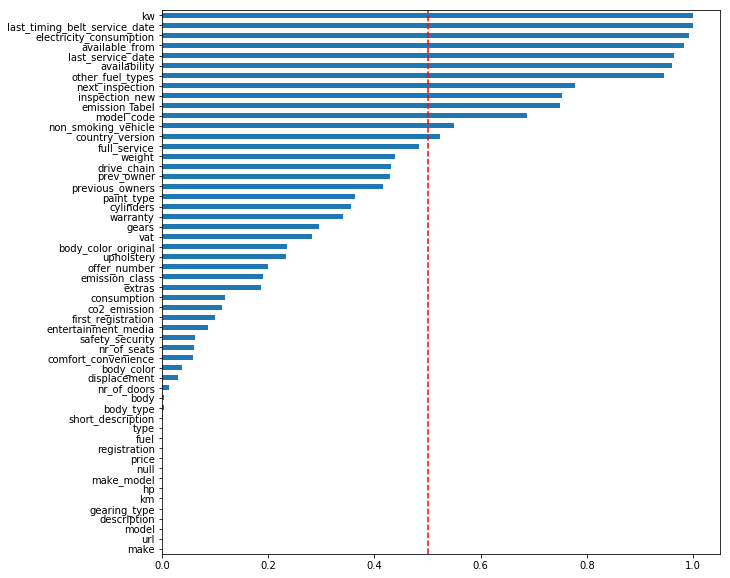

In [30]:
# Percentage of missing values withing columns (initial dataset before cleaning)
ax = autos.isnull().mean().sort_values().plot.barh(figsize=(10,10))
ax.axvline(x=0.5, color='r', linestyle='--')

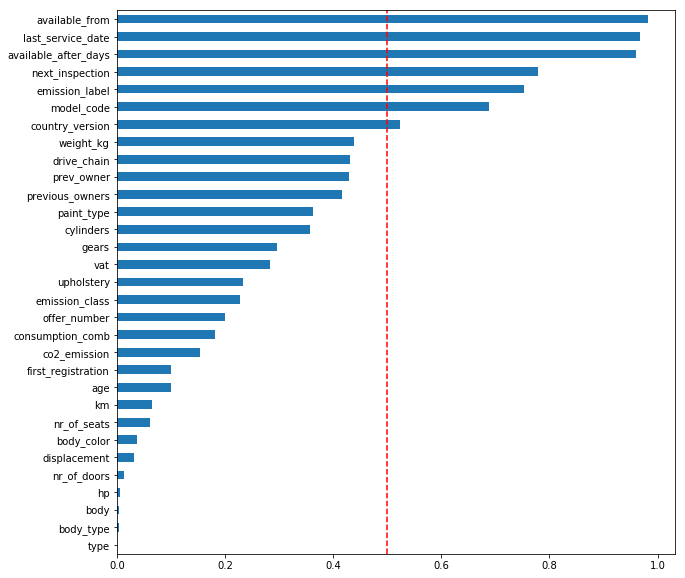

In [35]:
# Percentage of missing values withing columns (new dataset with values > 0)
ax = df.isnull().mean()[df.isnull().mean() > 0].sort_values().plot.barh(figsize=(10,10))
ax.axvline(x=0.5, color='r', linestyle='--')

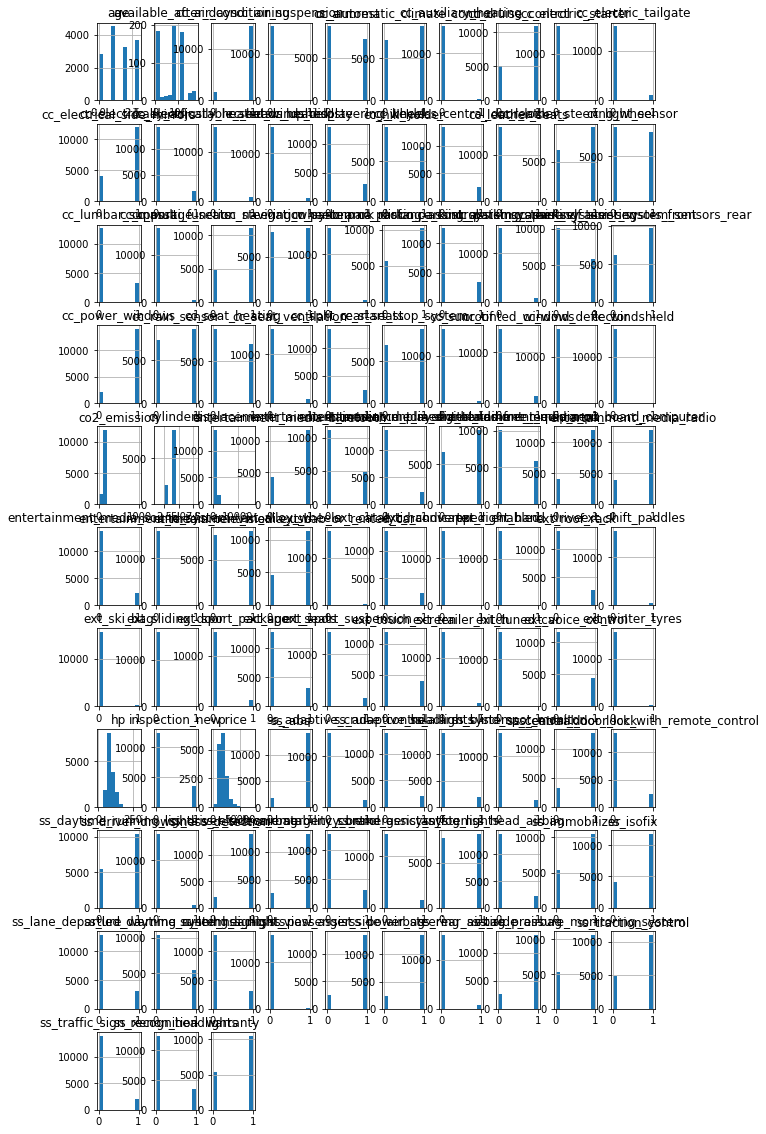

In [43]:
df.select_dtypes(exclude=['object', 'bool']).hist(figsize=(10,20))
plt.show()

##### Get_dummies ile olusturulan sutunlari filtrelemek icin daha iyi bir isimlendirmeye ihtiyac var.
##### Ornegin column name'in "_" ile baslamasi

##### Kendi aramizda dummy sutunlar icin isimlendirme standardizasyonu >>> Tam isim mi, kisalma mi?

In [49]:
dummy_prefixes = ['ss_', 'cc_', 'ext_', 'entertainment_']

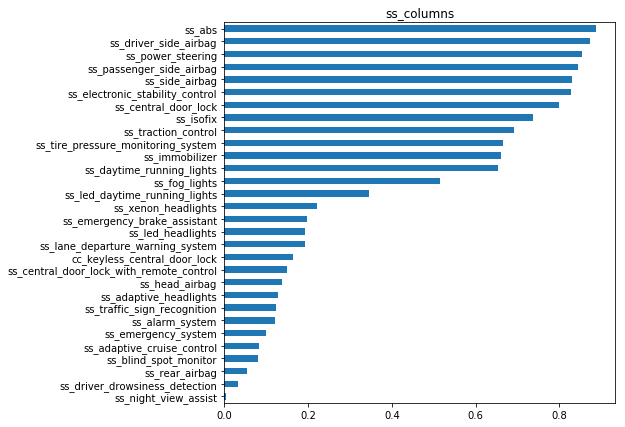

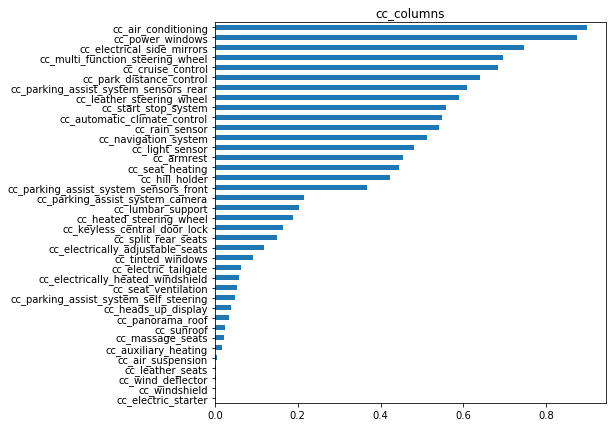

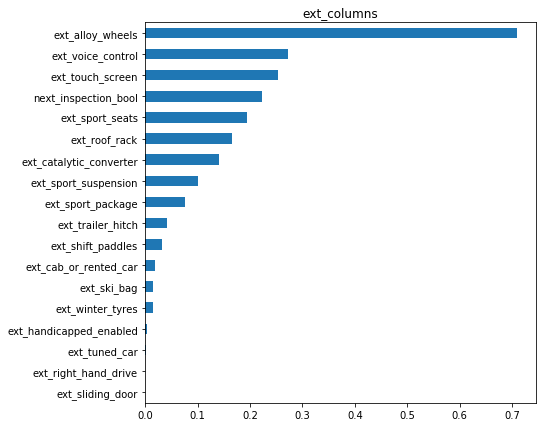

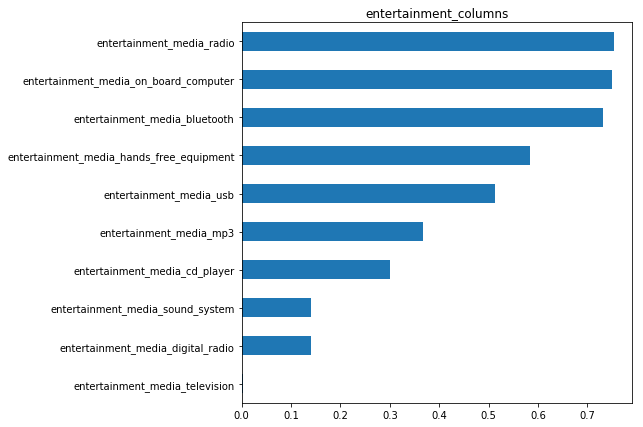

In [58]:
# Percentage '1's in Dummy columns
for i in dummy_prefixes:
    df.filter(like = i, axis = 1).mean().sort_values().plot.barh(figsize=(7,7))
    plt.title(i + "columns")
    plt.show()

##>> There seems to be many properties which are not very common among cars
##>>> However, those properties might prove more significant since the ones -such as ABS- 
##>>>> of which almost all the cars have may not affect the price